Dataset Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

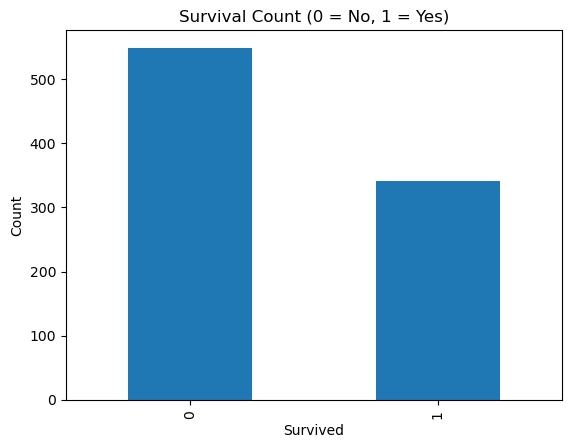

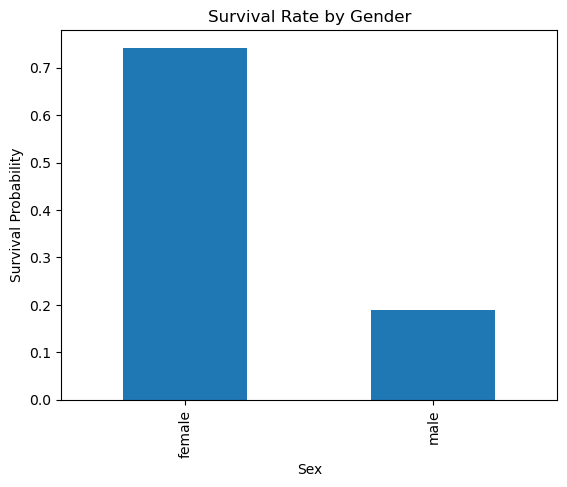

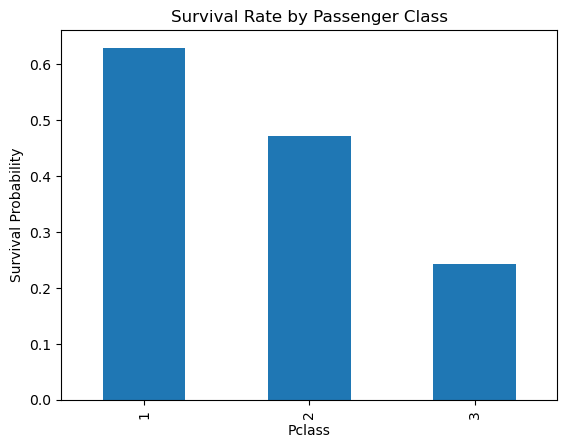


Dataset After Feature Engineering:

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True

Model Accuracy Comparison:

Logistic Regression: 0.8101
Random Forest: 0.8156

Best Model Confirmed: Random Forest


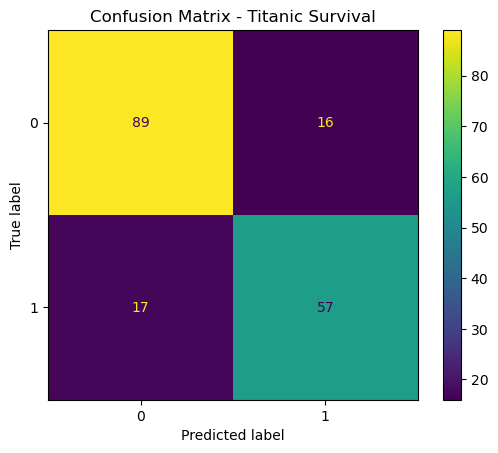


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



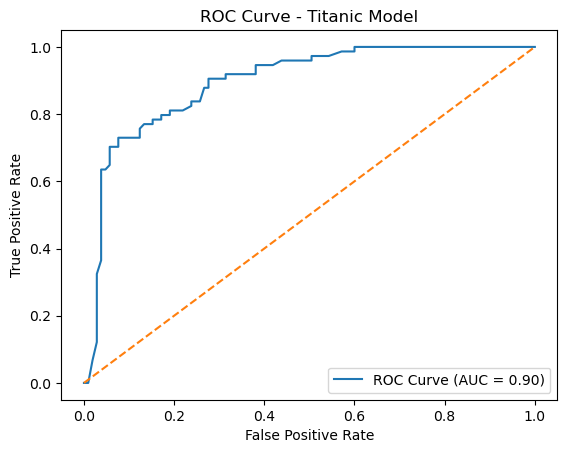

ROC AUC Score: 0.8952380952380953

========== FINAL REPORT ==========
Project: Titanic Survival Prediction
Dataset: Kaggle Titanic Dataset
Models Compared: Logistic Regression, Random Forest
Best Model: Random Forest
Best Accuracy: 0.8156424581005587
ROC AUC Score: 0.8952380952380953


In [1]:
# ==============================================
# Titanic Survival Prediction Project (Kaggle)
# Complete ML Workflow + GitHub Ready
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# ==============================================
# Step 1: Load Titanic Dataset (Kaggle)
# ==============================================

df = pd.read_csv("train.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# ==============================================
# Step 2: Data Cleaning & Preprocessing
# ==============================================

print("\nMissing Values:\n")
print(df.isnull().sum())

# Fill Missing Age with Median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Missing Embarked with Mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin Column (too many missing values)
df.drop("Cabin", axis=1, inplace=True)

print("\nAfter Cleaning Missing Values:\n")
print(df.isnull().sum())

# ==============================================
# Step 3: Visualization & Insights
# ==============================================

# Survival Count
plt.figure()
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Survival by Gender
plt.figure()
df.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()

# Survival by Passenger Class
plt.figure()
df.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")
plt.show()

# ==============================================
# Step 4: Feature Engineering
# ==============================================

# Convert Sex into numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# OneHotEncode Embarked
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Drop unnecessary columns
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

print("\nDataset After Feature Engineering:\n")
print(df.head())

# ==============================================
# Step 5: Train-Test Split
# ==============================================

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================================
# Step 6: Scaling Numerical Features
# ==============================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================================
# Step 7: Model Building & Comparison
# ==============================================

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

print("\nModel Accuracy Comparison:\n")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

# Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("\nBest Model Confirmed:", best_model_name)

# ==============================================
# Step 8: Confusion Matrix
# ==============================================

y_pred_best = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Titanic Survival")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))

# ==============================================
# Step 9: ROC Curve + AUC Score
# ==============================================

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Titanic Model")
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc)

# ==============================================
# Step 10: Final Report Summary
# ==============================================

print("\n========== FINAL REPORT ==========")
print("Project: Titanic Survival Prediction")
print("Dataset: Kaggle Titanic Dataset")
print("Models Compared: Logistic Regression, Random Forest")
print("Best Model:", best_model_name)
print("Best Accuracy:", results[best_model_name])
print("ROC AUC Score:", roc_auc)
print("==================================")